<a href="https://colab.research.google.com/github/alvaphelan/Python-HowTos/blob/main/Matplotlib1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plotting with Matplotlib PyPlot

Matplotlib.pyplot is an extremely useful tool when it comes to plotting all types of data, and you will be using it frequently. 

A tutorial on using Matplotlib PyPlot is available [here](https://matplotlib.org/stable/tutorials/introductory/pyplot.html)

Matplotlib has an extensive range of plots and options - we only touch on a few essentials here.

In this notebook the following topics are covered:
 * General plotting guidelines
 * Importing Matplotlib PyPlot
 * Setting default figure and font size for the notebook
 * Simple plot of some data points
 * Saving as a PDF
 * Plotting two data sets
 * Marker and Line styles
 * Plotting theory curves
 * Using LaTeX in figure titles and labels.

## General plotting guidelines.

In general, you should make sure of the following when plotting experimental data:
 * make sure to include a **title** and to **label the x- and y- axes** including units (if relevant)
 * the **font size** should be large enough that axes labels, values and all other text are easy to read.
 * **experimental measurements** should be presented as **points** (with error bars if the errors are known) with the points **not connected by lines**. The measurements were only made at discrete points and not every point in between. There are rare occasions when you may connect the point with lines - such as dramatic variability which would not otherwise be easy to see and which lines can help show the trend. 
 * any **theory / best fit / continuous functions** that are plotted should be presented as **lines** (assuming the theory is valid at all points)
 * theory or best-fit curves ovelaid with data might need a higher density of values to capture the true variation (i..e don't just calculate the theory at the experimental points and connect with straight lines) - see example at end.
 * gridlines may be useful if one needs to read off values from a graph.
 * if there is more than one data set then a legend should be used to distinguish.
 * for inclusion in reports a high-quality vector format (such as PDF) should be used.

## Import Matplotlib PyPlot

Import using:

In [58]:
import matplotlib.pyplot as plt

## Setting default figure and font size for all plots in a notebook

While the figure dimensions and plot size can be specified for each individual graph, the default values for all figures in a notebook can be set using the commands in the cell below. For this to work consistently the commands must be in a separate cell following the import of pyplot - we recommend importing pyplot near teh start of your document and placing the cell to specify the default sizes immediately afterwards. 

In [59]:
plt.rcParams['figure.figsize'] = (6,4)
plt.rcParams['font.size'] = 12

# bbox tight needed to ensure labels not cut off when font size increased!
plt.rcParams['savefig.bbox'] = 'tight'  

## Make some fake data for plotting examples

In [60]:
# make two fake data sets

import numpy as np

V = np.linspace(0, 10, 20)
I1 = 6 * V
I2 = 6 * V + 0.1 * V**2

## PyPlot plot() command

### Simplest plot() example

Points can be plotted with the  or PyPlot `plot()` commands.

More information on the `plot()` command can be found [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)

By default plot connects with lines and does not show the points. 
This is easy to change as seen below. 

Also matplotlib commands usually return a text string result which gets printed before the plot - in a Jupyter Notebook you can suppress the printing of the values returned by a function by adding a semicolon to the end of the line.

Example: plot data as points

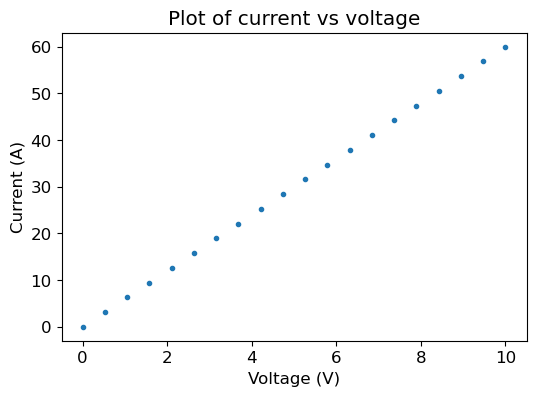

In [61]:
plt.plot(V, I1, ".");  
# the dot says to use points - default
# other options include: +, o, x, ....

plt.title("Plot of current vs voltage")
plt.xlabel("Voltage (V)")
plt.ylabel("Current (A)");  # semi-colon suppresses printing of xlabel return value

### Saving as a PDF

To save a figure use the pyplot command `savefig(filename)`.

Pyplot decides the format to save the figure in based on the filename extension.

So, to save as PDF use `plt.savefig("filename.pdf")`.

Repeat previous example and save figure

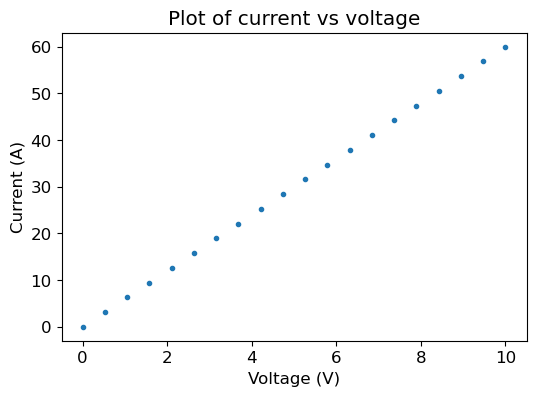

In [62]:
plt.plot(V, I1, ".");  

plt.title("Plot of current vs voltage")
plt.xlabel("Voltage (V)")
plt.ylabel("Current (A)");  # semi-colon suppresses printing of xlabel return value

plt.savefig("my_first_plot.pdf")

### Plotting two data sets 

In this example we plot two data sets in different colours and marker types.

There are many many marker types - see the [docs](https://matplotlib.org/stable/api/markers_api.html))

We also label them and add a legend and a grid.

Note: 
The `legend()` command has an option called `loc` which allows one to override the default placement of the legend. `loc` can be either a code (0 to 10) or corresponding text (e.g. `upper right`): see documentation [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html). Example usage: `plt.legend(loc="lower right")`

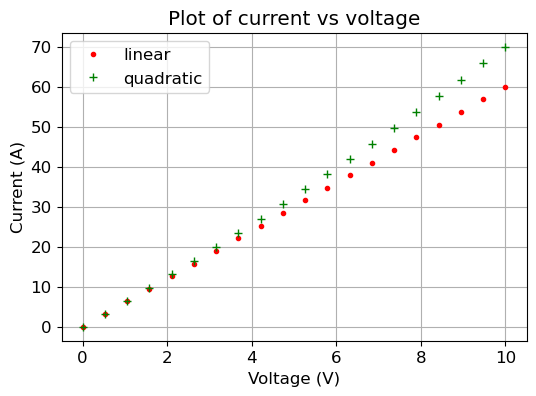

In [63]:
plt.plot(V, I1, 'r.', label="linear")
plt.plot(V, I2, 'g+', label="quadratic");

plt.title("Plot of current vs voltage")
plt.xlabel("Voltage (V)")
plt.ylabel("Current (A)")

plt.legend();  
plt.grid()

## Marker and Line styles

In addition to the ways specified above, you can also specify marker and line styles, sizes and colours using options.

Note: in the examples blow `mfc` is shorthand for "markerfacecolour" which changes the face of filled markers.
For more information see [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html).

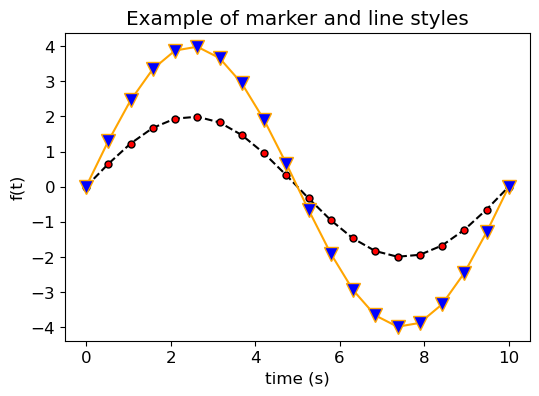

In [65]:
time = np.linspace(0,10,20)
y = 2*np.sin(2*np.pi*0.1*t)

plt.plot(time, y, marker=".", markersize=10, mfc="red", linestyle="--", color="black");
plt.plot(time, 2*y, marker="v", markersize=10, mfc="blue", linestyle="-", color="orange");

plt.title("Example of marker and line styles")
plt.xlabel("time (s)")
plt.ylabel("f(t)");

## Example illustrating need to more finely sample theoretical curves

This example of an exponential decay shows the need to more finely sample the expected theoretical  / best fit curve. 

Text(0, 0.5, 'exp(-t)')

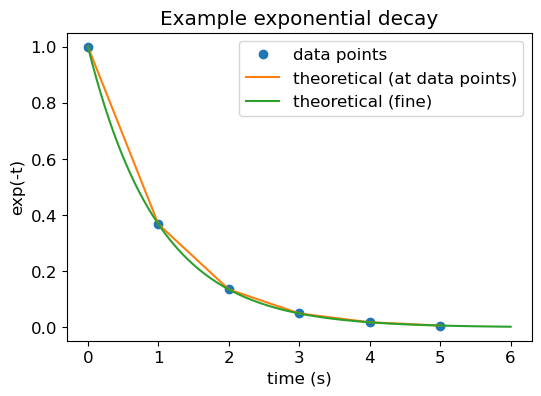

In [68]:
t = np.arange(6)

y = np.exp(-t)

plt.plot(t, y, "o", label="data points")

plt.plot(t, y, "-", label="theoretical (at data points)")

tfine = np.linspace(0, 6, 100)
yfine = np.exp(-tfine)
plt.plot(tfine, yfine, "-", label="theoretical (fine)")
plt.legend()

plt.title("Example exponential decay")
plt.xlabel("time (s)")
plt.ylabel("exp(-t)")

##  LaTeX in axes labels and plot titles

LaTeX symbols and equations may be included in plot titles and axes labels.

However sometimes LaTeX expressions are misinterpreted in Python strings and it is necessary to use *raw string*, which are made be appending an *r* before the string. Note: you can have strings that are both raw and f-strings by appending both *r* and *f*.

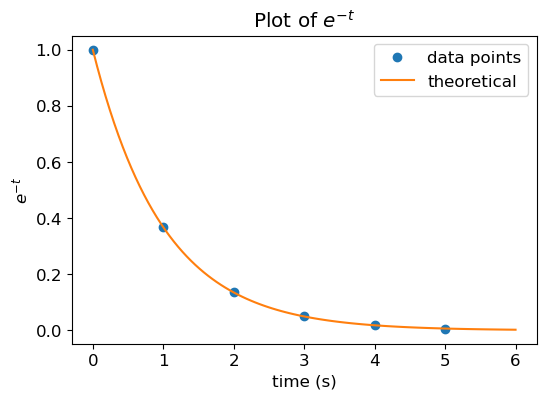

In [70]:
t = np.arange(6)

y = np.exp(-t)

plt.plot(t, y, "o", label="data points")

tfine = np.linspace(0, 6, 100)
yfine = np.exp(-tfine)
plt.plot(tfine, yfine, "-", label="theoretical")
plt.legend()

plt.title(r"Plot of $e^{-t}$")
plt.xlabel("time (s)")
plt.ylabel(r"$e^{-t}$");